# 과제#1. car seat 매출 예측

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 이를 해결하고자 여러분들에게 예측 모델링을 의뢰하였습니다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|


* 데이터
    * data : 학습과 검증용
    * test : **팀과제용** 입니다.
        * feature만 있습니다.
        * 운영에서 발생된 데이터로 간주하고, 예측한 후에 Kaggle에 업로드합니다.

* 주의사항
    * data 에 대해 수행한 전처리 코드를 **순서에 맞춰** test에도 적용해야 함.

## 0.환경준비

### 0.1 Import

In [804]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 0.2 Data Loading

In [805]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


* 아래 데이터는 **팀 과제**를 위해 필요합니다.

In [806]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_test_x.csv'

test = pd.read_csv(path)
test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,131.0,111.0,13,33,80,Bad,68,18,Yes,Yes
1,123.0,57.0,0,66,105,Medium,39,11,Yes,No
2,136.0,60.0,7,303,147,Medium,41,10,Yes,Yes
3,143.0,77.0,25,448,156,Medium,43,17,Yes,Yes
4,111.0,75.0,1,377,108,Good,25,12,Yes,No


## 1.데이터 탐색

## 2.데이터 전처리 

In [807]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [808]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [809]:
# x_col = list(x.columns)
# x_col.append('target')
# pd.concat([x, y], axis=1).corr()

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [810]:
x.isna().sum()

CompPrice      13
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

In [811]:
x.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,287.000000,288.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,125.344948,68.673611,6.600000,266.950000,115.930000,52.963333,13.906667
std,14.551674,28.558597,6.569413,148.112339,22.149653,16.377098,2.601380
min,86.000000,21.000000,0.000000,12.000000,49.000000,25.000000,10.000000
25%,116.000000,42.000000,0.000000,136.250000,101.000000,39.000000,12.000000
50%,125.000000,69.000000,5.000000,278.000000,117.000000,54.000000,14.000000
75%,135.000000,93.000000,11.000000,400.000000,131.000000,65.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [812]:
x[['CompPrice', 'Income']].describe()

,CompPrice,Income
count,287.000000,288.000000
mean,125.344948,68.673611
std,14.551674,28.558597
min,86.000000,21.000000
25%,116.000000,42.000000
50%,125.000000,69.000000
75%,135.000000,93.000000
max,175.000000,120.000000


In [814]:
x[['CompPrice', 'Income']] = x[['CompPrice', 'Income']].fillna(x[['CompPrice', 'Income']].median())

In [815]:
x.isna().sum()

CompPrice      13
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [816]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CompPrice    287 non-null    float64
 1   Income       288 non-null    float64
 2   Advertising  300 non-null    int64  
 3   Population   300 non-null    int64  
 4   Price        300 non-null    int64  
 5   ShelveLoc    300 non-null    object 
 6   Age          300 non-null    int64  
 7   Education    300 non-null    int64  
 8   Urban        300 non-null    object 
 9   US           300 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 23.6+ KB


In [817]:
cat_col = ['ShelveLoc', 'Urban', 'US', 'Education']

x = pd.get_dummies(data=x, columns=cat_col, drop_first=True)

### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.

* 경쟁사와 가격의 비율 Price / CompPrice

In [818]:
x['PriceRate'] = x['Price'] / x['CompPrice']

In [819]:
x['AgeGroup'] = pd.cut(
    x['Age'], 
    bins=[20, 30, 40, 50, 60, 70, np.inf],
    labels=['20_29', '30_39', '40_49', '50_59', '60_69', '70_'],
    right=False
)


In [820]:
x['PopulationGroup'] = pd.cut(
    x['Population'], 
    bins=[0, 100, 200, 300, 400, np.inf],
    labels=['~100', '100~199', '200~299', '300~399', '400~'],
    right=False
)


In [821]:
x['AdvertisingGroup'] = pd.cut(
    x['Advertising'], 
    bins=[0, 10, 20, np.inf],
    labels=['~10', '11~20', '21~']
)

In [822]:
x.drop(['Age', 'Population', 'Advertising'], axis=1, inplace=True)

In [823]:
cat_col = ['AgeGroup', 'PopulationGroup', 'AdvertisingGroup']

x = pd.get_dummies(data=x, columns=cat_col, drop_first=True)

### 2.5 데이터 분할
* train 데이터를 train : val 로 분할하시오.
* train set의 적절한 사이즈를 결정하시오.

In [738]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

In [739]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((210, 27), (90, 27), (210,), (90,))

In [740]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [741]:
num_col = ['CompPrice', 'Income', 'Price']

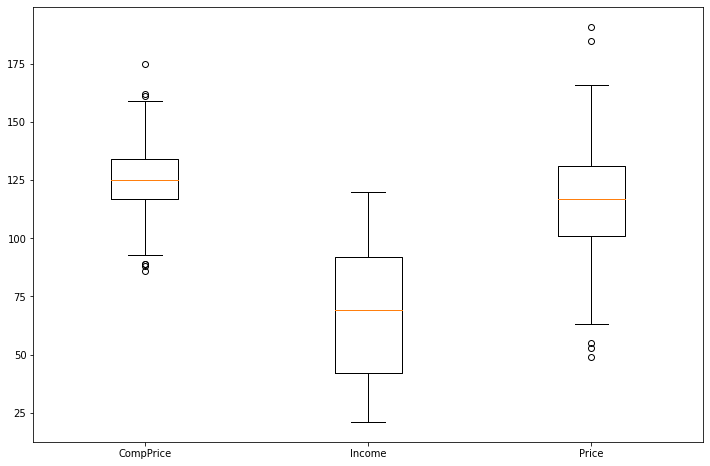

In [742]:
plot_list = [x[col] for col in num_col]

plt.figure(figsize=(12, 8))
plt.boxplot(plot_list)
plt.xticks([i for i in range(1, len(num_col) + 1)], num_col)
plt.show()

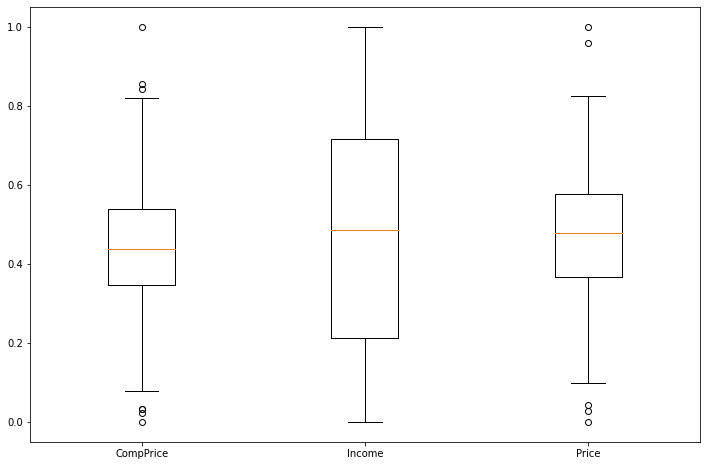

In [743]:
x[num_col] = (x[num_col] - x[num_col].min()) / (x[num_col].max() - x[num_col].min())

plot_list = [x[col] for col in num_col]
plt.figure(figsize=(12, 8))
plt.boxplot(plot_list)
plt.xticks([i for i in range(1, len(num_col)+1)], num_col)
plt.show()

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [744]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

In [745]:
result = {}

#### (1) Linear Regression 모델링

In [746]:
model_linear = LinearRegression()

In [747]:
cv_score = cross_val_score(model_linear, x_train, y_train, cv=10, scoring='neg_mean_absolute_error')
print(-1*cv_score.mean())

0.9439895686842489


In [748]:
result["Linear"] = -1 * cv_score.mean()

#### (2) Decision Tree 모델링

In [749]:
model_tree = DecisionTreeRegressor(random_state=2022)

In [750]:
params = {
    "max_depth" :range(3, 21)
}

In [751]:
model = GridSearchCV(
    model_tree,
    params,
    cv=10,
    scoring='neg_mean_absolute_error'
)

In [752]:
model.fit(x_train, y_train)
# model_tree.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=2022),
             param_grid={'max_depth': range(3, 21)},
             scoring='neg_mean_absolute_error')

In [753]:
print(model.best_estimator_)
print(-1 * model.best_score_)

DecisionTreeRegressor(max_depth=5, random_state=2022)
1.5051124766222317


In [754]:
result["Tree"] = -1 * model.best_score_
# y_pred = model_tree.predict(x_test)
# result["Tree"] = mean_absolute_error(y_test, y_pred)

#### (3) KNN 모델링

In [755]:
model_knn = KNeighborsRegressor()

In [756]:
params= {
    "n_neighbors" : range(1, 11)
}

In [757]:
model = GridSearchCV(
    model_knn,
    params,
    cv=10,
    scoring='neg_mean_absolute_error'
)

In [758]:
# model_knn.fit(x_train, y_train)
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 11)},
             scoring='neg_mean_absolute_error')

In [759]:
print(model.best_estimator_)
print(-1 * model.best_score_)

KNeighborsRegressor(n_neighbors=10)
1.863995238095238


In [760]:
result["KNN"] = -1 * model.best_score_
# y_pred = model_knn.predict(x_test)
# result["KNN"] = mean_absolute_error(y_test, y_pred)


#### (4) SVM 모델링

In [761]:
model_svm = SVR()

In [762]:
params = {
    'C' : np.logspace(0, 4, 5),
    'epsilon' : np.logspace(-3, 1, 5),
    'gamma' : np.logspace(-3, 1, 5)
}

In [763]:
model = GridSearchCV(
    model_svm,
    params,
    cv=10,
    scoring='neg_mean_absolute_error'
)

In [764]:
model.fit(x_train, y_train)
# model_svm.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             scoring='neg_mean_absolute_error')

In [765]:
print(model.best_estimator_)
print(-1 * model.best_score_)

SVR(C=10000.0, gamma=0.001)
0.9614092740661203


In [766]:
result["SVM"] = -1 * model.best_score_
# y_pred = model_svm.predict(x_test)
# result['svm'] = mean_absolute_error(y_test, y_pred)

#### (5) Random Forest 모델링

#### (6) XGB 모델링

In [767]:
model_xgb = XGBRegressor(random_state=2022)

In [768]:
params = {
    "max_depth" : range(3, 11),
    "n_estimators" : range(50, 111, 10)
}

In [769]:
model = GridSearchCV(
    model_xgb,
    params,
    cv=10,
    scoring='neg_mean_absolute_error'
)

In [770]:
model.fit(x_train, y_train)
# model_xgb.fit(x_train, y_train)

/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pa

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=2022, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [771]:
print(model.best_estimator_)
print(-1 * model.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
1.1305111289932614


In [772]:
result["XGB"] = -1 * model.best_score_
# y_pred = model_xgb.predict(x_test)
# result["XGB"] = mean_absolute_error(y_test, y_pred)

## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [773]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

* 모델1 

In [774]:
es = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

In [775]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(x_train.shape[1], )))
model.add(keras.layers.Dense(1))
model.compile(
    loss='mae',
    optimizer='adam'
)
model.fit(x_train, y_train, verbose=1, epochs=1000, validation_split=0.2, callbacks=[es])

Epoch 1/1000
6/6 [==============================] - 0s 28ms/step - loss: 7.3745 - val_loss: 7.4417
Epoch 2/1000
6/6 [==============================] - 0s 5ms/step - loss: 7.3296 - val_loss: 7.3970
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step - loss: 7.2841 - val_loss: 7.3527
Epoch 4/1000
6/6 [==============================] - 0s 6ms/step - loss: 7.2396 - val_loss: 7.3082
Epoch 5/1000
6/6 [==============================] - 0s 6ms/step - loss: 7.1945 - val_loss: 7.2640
Epoch 6/1000
6/6 [==============================] - 0s 6ms/step - loss: 7.1502 - val_loss: 7.2195
Epoch 7/1000
6/6 [==============================] - 0s 5ms/step - loss: 7.1053 - val_loss: 7.1754
Epoch 8/1000
6/6 [==============================] - 0s 6ms/step - loss: 7.0607 - val_loss: 7.1314
Epoch 9/1000
6/6 [==============================] - 0s 6ms/step - loss: 7.0161 - val_loss: 7.0872
Epoch 10/1000
6/6 [==============================] - 0s 6ms/step - loss: 6.9715 - val_loss: 7.0429
Epoch 11/1000
6/6 

In [776]:
y_pred = model.predict(x_test)

result["SimpleANN"] = mean_absolute_error(y_test, y_pred)

* 모델2

In [777]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(x_train.shape[1], )))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(
    loss='mae',
    optimizer='adam'
)
model.fit(x_train, y_train, verbose=1, epochs=1000, validation_split=0.2, callbacks=[es])

Epoch 1/1000
6/6 [==============================] - 1s 37ms/step - loss: 7.5750 - val_loss: 7.3557
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 7.0735 - val_loss: 6.2261
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.1481 - val_loss: 2.3736
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 2.6523 - val_loss: 2.5406
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 2.5454 - val_loss: 2.2094
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 2.6787 - val_loss: 1.9252
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 2.1000 - val_loss: 1.8800
Epoch 8/1000
6/6 [==============================] - 0s 7ms/step - loss: 2.0200 - val_loss: 1.6608
Epoch 9/1000
6/6 [==============================] - 0s 8ms/step - loss: 2.0466 - val_loss: 1.7275
Epoch 10/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.6835 - val_loss: 2.2189
Epoch 11/1000
6/6 

In [778]:
y_pred = model.predict(x_test)
result["HiddenLayerANN"] = mean_absolute_error(y_test, y_pred)

* 모델3

In [779]:
num_col.append('PriceRate')
print(num_col)

['CompPrice', 'Income', 'Price', 'PriceRate']


In [780]:
x_train_num = x_train.loc[:, num_col]
x_train_cat = x_train.loc[:, x_train.columns.difference(num_col)]

x_test_num = x_test.loc[:, num_col]
x_test_cat = x_test.loc[:, x_test.columns.difference(num_col)]

In [781]:
il_num = keras.layers.Input(shape=(x_train_num.shape[1],))
hl_num = keras.layers.Dense(128, activation="relu")(il_num)
hl_num = keras.layers.Dense(64, activation="relu")(hl_num)
hl_num = keras.layers.Dense(32, activation="relu")(hl_num)

il_cat = keras.layers.Input(shape=(x_train_cat.shape[1],))
hl_cat = keras.layers.Dense(128, activation="relu")(il_cat)
hl_cat = keras.layers.Dense(64, activation="relu")(hl_cat)
hl_cat = keras.layers.Dense(32, activation="relu")(hl_cat)

cl = keras.layers.Concatenate()([hl_num, hl_cat])
ol = keras.layers.Dense(1)(cl)

model = keras.models.Model([il_num, il_cat], ol)

model.compile(loss="mae", optimizer="adam")
model.fit(
    [x_train_num, x_train_cat],
    y_train,
    verbose=1,
    epochs=1000,
    validation_split=0.2,
    callbacks=[es],
)


Epoch 1/1000
6/6 [==============================] - 1s 38ms/step - loss: 7.5921 - val_loss: 7.3164
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 7.1777 - val_loss: 6.8395
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step - loss: 6.6351 - val_loss: 6.1344
Epoch 4/1000
6/6 [==============================] - 0s 6ms/step - loss: 5.8062 - val_loss: 5.0629
Epoch 5/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.6234 - val_loss: 3.4200
Epoch 6/1000
6/6 [==============================] - 0s 6ms/step - loss: 3.1410 - val_loss: 1.9805
Epoch 7/1000
6/6 [==============================] - 0s 6ms/step - loss: 2.5097 - val_loss: 2.1326
Epoch 8/1000
6/6 [==============================] - 0s 6ms/step - loss: 2.7605 - val_loss: 2.1271
Epoch 9/1000
6/6 [==============================] - 0s 6ms/step - loss: 2.5475 - val_loss: 1.6830
Epoch 10/1000
6/6 [==============================] - 0s 6ms/step - loss: 2.2747 - val_loss: 1.7573
Epoch 11/1000
6/6 

In [782]:
y_pred = model.predict([x_test_num, x_test_cat])
print(mean_absolute_error(y_test, y_pred))

2.1637764809926354


In [783]:
result["NumCatANN"] = mean_absolute_error(y_test, y_pred)

### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


## 5.성능 비교

* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

In [784]:
result = sorted(result.items(), key=lambda x : x[1])
result = dict(result)

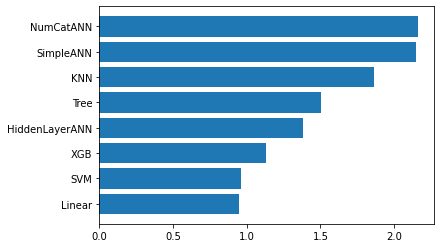

In [785]:
plt.barh(y=list(result.keys()), width=list(result.values()))
plt.show()

In [790]:
print(result)

{'Linear': 0.9439895686842489, 'SVM': 0.9614092740661203, 'XGB': 1.1305111289932614, 'HiddenLayerANN': 1.379099374877082, 'Tree': 1.5051124766222317, 'KNN': 1.863995238095238, 'SimpleANN': 2.150843142827352, 'NumCatANN': 2.1637764809926354}


* MeanAbsoluteError을 봤을때는 linear, XGB, NumCatAnn의 순서대로 낮다.
* Linear 모델 선택

## 6.[팀과제]Test set으로 예측
* 전처리 코드 실행
* 예측
* 성능 튜닝 : Kaggle에서의 평가는 MAE로 하게 됩니다. 

#### 6.1 전처리 코드실행

* 주의!!! 
    * 전처리 코드는 2번에서의 순서를 반드시 지켜서 실행해야 합니다.
    * 중간에 오류가 나면, 순서가 맞지 않기때문에 발생될 수 있습니다. 


In [786]:
# 가변수화 코드 실행


In [787]:
# NAN 채우기


In [788]:
# 경쟁사와 가격 차 변수 만들기


In [789]:
# 스케일링


#### 6.2 예측

* 5에서 가장 좋은 성능의 모델로 예측을 시도합니다.
* 결과를 csv 파일로 저장해서 업로드 합니다.